<a href="https://colab.research.google.com/github/Jamakasilwane/EDSA_Zindi_Hackathon/blob/master/EDSA_Zindi_Hackathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Processing**

### Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [0]:
dataset_train = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Train.csv")
dataset_test = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Test.csv")
dataset_sample = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/SampleSubmission.csv")
var = pd.read_csv('https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/VariableDefinitions.csv')

### Encoding Categorical Data


#### Platform Type

In [0]:
# one hot encoding of the 'Platform Type' column:
#TRAIN
dataset_train['Platform Type'] = dataset_train['Platform Type'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns=['Platform Type']), pd.get_dummies(dataset_train['Platform Type'])], axis=1)

#TEST 
dataset_test['Platform Type'] = dataset_test['Platform Type'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns=['Platform Type']), pd.get_dummies(dataset_test['Platform Type'])], axis=1)

In [0]:
#Renaming the 'platform type' columns
dataset_train.rename(columns={1: "Platform Type 1", 2: "Platform Type 2", 3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)
dataset_test.rename(columns={1: "Platform Type 1", 2: "Platform Type 2", 3: "Platform Type 3", 4: "Platform Type 4"}, inplace=True)

#### Personal or Business

In [0]:
# one hot encoding of the 'Personal or Business' column
#Train
dataset_train['Personal or Business'] = dataset_train['Personal or Business'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns=['Personal or Business']), pd.get_dummies(dataset_train['Personal or Business'])], axis=1)

#Test
dataset_test['Personal or Business'] = dataset_test['Personal or Business'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns=['Personal or Business']), pd.get_dummies(dataset_test['Personal or Business'])], axis=1)

In [0]:
#Renaming the 'Personal or Business' columns
dataset_train.rename(columns={0: "Business", 1: "Personal"}, inplace=True)
dataset_test.rename(columns={0: "Business", 1: "Personal"}, inplace=True)

DATETIME COLUMNS

###### All the columns which constists of date and times were converted to datetime

In [0]:
#Train
dataset_train['Placement - Time']=pd.to_datetime(dataset_train['Placement - Time'])
dataset_train['Confirmation - Time']=pd.to_datetime(dataset_train['Confirmation - Time'])

dataset_train['Arrival at Pickup - Time']=pd.to_datetime(dataset_train['Arrival at Pickup - Time'])
dataset_train['Pickup - Time']=pd.to_datetime(dataset_train['Pickup - Time'])

### Test
dataset_test['Placement - Time']=pd.to_datetime(dataset_test['Placement - Time'])
dataset_test['Confirmation - Time']=pd.to_datetime(dataset_test['Confirmation - Time'])

dataset_test['Arrival at Pickup - Time']=pd.to_datetime(dataset_test['Arrival at Pickup - Time'])
dataset_test['Pickup - Time']=pd.to_datetime(dataset_test['Pickup - Time'])

In [0]:
#In this section Hours were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Hour']=dataset_train['Placement - Time'].dt.hour
dataset_train['Confirmation - Hour']=dataset_train['Confirmation - Time'].dt.hour

dataset_train['Arrival at Pickup - Hour']=dataset_train['Arrival at Pickup - Time'].dt.hour
dataset_train['Pickup - Hour']=dataset_train['Pickup - Time'].dt.hour

#Test
dataset_test['Placement - Hour']=dataset_test['Placement - Time'].dt.hour
dataset_test['Confirmation - Hour']=dataset_test['Confirmation - Time'].dt.hour

dataset_test['Arrival at Pickup - Hour']=dataset_test['Arrival at Pickup - Time'].dt.hour
dataset_test['Pickup - Hour']=dataset_test['Pickup - Time'].dt.hour

In [0]:
#In this section Minutes were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Minutes']=dataset_train['Placement - Time'].dt.minute
dataset_train['Confirmation - Minutes']=dataset_train['Confirmation - Time'].dt.minute

dataset_train['Arrival at Pickup - Minutes']=dataset_train['Arrival at Pickup - Time'].dt.minute
dataset_train['Pickup - Minutes']=dataset_train['Pickup - Time'].dt.minute

#Test
dataset_test['Placement - Minutes']=dataset_test['Placement - Time'].dt.minute
dataset_test['Confirmation - Minutes']=dataset_test['Confirmation - Time'].dt.minute

dataset_test['Arrival at Pickup - Minutes']=dataset_test['Arrival at Pickup - Time'].dt.minute
dataset_test['Pickup - Minutes']=dataset_test['Pickup - Time'].dt.minute

In [0]:
#In this section Seconds were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Seconds']=dataset_train['Placement - Time'].dt.second
dataset_train['Confirmation - Seconds']=dataset_train['Confirmation - Time'].dt.second

dataset_train['Arrival at Pickup - Seconds']=dataset_train['Arrival at Pickup - Time'].dt.second
dataset_train['Pickup - Seconds']=dataset_train['Pickup - Time'].dt.second

### Test
dataset_test['Placement - Seconds']=dataset_test['Placement - Time'].dt.second
dataset_test['Confirmation - Seconds']=dataset_test['Confirmation - Time'].dt.second

dataset_test['Arrival at Pickup - Seconds']=dataset_test['Arrival at Pickup - Time'].dt.second
dataset_test['Pickup - Seconds']=dataset_test['Pickup - Time'].dt.second

## Selecting columns to be used for model training and testing 

In [0]:
X1 = dataset_train.loc[:,['Order No','Distance (KM)','Temperature','Precipitation in millimeters','Platform Type 1', 'Platform Type 2',
       'Platform Type 3', 'Platform Type 4', 'Business', 'Personal','Placement - Hour', 'Confirmation - Hour', 'Arrival at Pickup - Hour',
       'Pickup - Hour', 'Placement - Minutes', 'Confirmation - Minutes','Arrival at Pickup - Minutes', 'Pickup - Minutes','Placement - Seconds', 'Confirmation - Seconds','Arrival at Pickup - Seconds', 'Pickup - Seconds']]

Y_train = dataset_train.loc[:,['Time from Pickup to Arrival']].values

X2 = dataset_test.loc[:,['Order No','Distance (KM)','Temperature','Precipitation in millimeters','Platform Type 1', 'Platform Type 2',
       'Platform Type 3', 'Platform Type 4', 'Business', 'Personal','Placement - Hour', 'Confirmation - Hour', 'Arrival at Pickup - Hour',
       'Pickup - Hour', 'Placement - Minutes', 'Confirmation - Minutes','Arrival at Pickup - Minutes', 'Pickup - Minutes','Placement - Seconds', 'Confirmation - Seconds','Arrival at Pickup - Seconds', 'Pickup - Seconds']]

Y_test = dataset_sample.iloc[:,-1].values

In [0]:
#changing the Index for both X_train & X_test Dataframes to be Order No and convert the Dataframes to Numpy arrays
X_train = X1.set_index('Order No').values
X_test = X2.set_index('Order No').values

## Taking care of missing values in the data sets

In [117]:
#check for missing Values in Train
missing_train_values = X1.isnull().sum()
missing_train_values

Order No                            0
Distance (KM)                       0
Temperature                      4366
Precipitation in millimeters    20649
Platform Type 1                     0
Platform Type 2                     0
Platform Type 3                     0
Platform Type 4                     0
Business                            0
Personal                            0
Placement - Hour                    0
Confirmation - Hour                 0
Arrival at Pickup - Hour            0
Pickup - Hour                       0
Placement - Minutes                 0
Confirmation - Minutes              0
Arrival at Pickup - Minutes         0
Pickup - Minutes                    0
Placement - Seconds                 0
Confirmation - Seconds              0
Arrival at Pickup - Seconds         0
Pickup - Seconds                    0
dtype: int64

In [118]:
#check for missing Values in Test data
missing_test_values = X2.isnull().sum()
missing_test_values

Order No                           0
Distance (KM)                      0
Temperature                     1437
Precipitation in millimeters    6869
Platform Type 1                    0
Platform Type 2                    0
Platform Type 3                    0
Platform Type 4                    0
Business                           0
Personal                           0
Placement - Hour                   0
Confirmation - Hour                0
Arrival at Pickup - Hour           0
Pickup - Hour                      0
Placement - Minutes                0
Confirmation - Minutes             0
Arrival at Pickup - Minutes        0
Pickup - Minutes                   0
Placement - Seconds                0
Confirmation - Seconds             0
Arrival at Pickup - Seconds        0
Pickup - Seconds                   0
dtype: int64

###### Temperature and Precipitation in millimeters have the the highest missing values

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_train[:,1:3],X_test[:,1:3])
X_train[:,1:3] = imputer.transform(X_train[:,1:3])
X_test[:,1:3] = imputer.transform(X_test[:,1:3])

#The missing values of temperature and Precipitation in millimeters have been replaced with the most frequent values

In [120]:
X_train

array([[ 4. , 20.4,  2. , ..., 10. , 47. , 30. ],
       [16. , 26.4,  2. , ..., 21. , 22. ,  9. ],
       [ 3. , 24.7,  2. , ..., 44. , 34. ,  3. ],
       ...,
       [20. , 29.2,  2. , ...,  9. , 17. , 52. ],
       [13. , 15. ,  2. , ..., 53. , 59. , 15. ],
       [12. , 30.9,  2. , ...,  1. , 29. , 55. ]])

## Exploratory Data Analysis

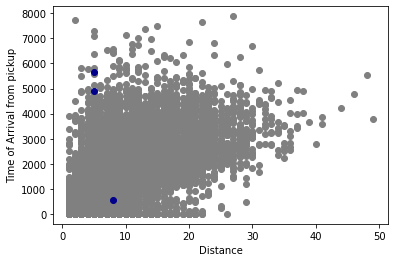

In [121]:
plt.scatter(X_train[:,0], Y_train, color='grey', label='Training') 
plt.scatter(X_test[:,0], Y_test, color='darkblue', label='Testing') 
plt.xlabel('Distance')
plt.ylabel('Time of Arrival from pickup')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


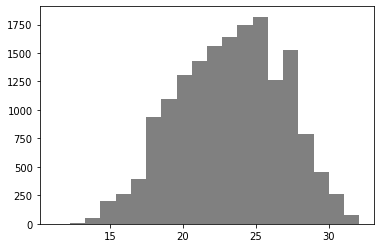

In [122]:
plt.hist(dataset_train['Temperature'],color='grey', bins=20)  
plt.show()

##### The mean temperature at the time of order placement is 25 Degrees Celsius 

In [123]:
var

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


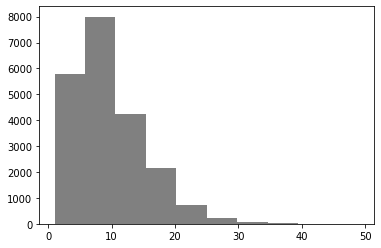

In [124]:
plt.hist(dataset_train['Distance (KM)'],color='grey', bins=10)  
plt.show()

##### The longest distance from  from Pickup to Destination is 10Km 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([449.,  68.,   0.,   0.,   5.,  15.,   0.,   0.,   6.,   9.]),
 array([ 0.1, 10. , 19.9, 29.8, 39.7, 49.6, 59.5, 69.4, 79.3, 89.2, 99.1]),
 <a list of 10 Patch objects>)

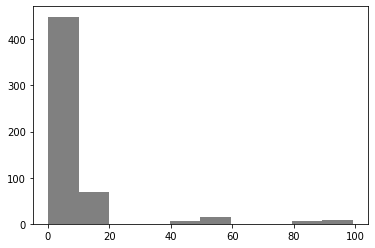

In [125]:
plt.hist(dataset_train['Precipitation in millimeters'],color='grey',density=False, bins=10)  


#### The most common level of precipitation at the time of order placement was less than 20ml

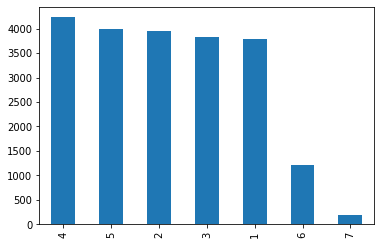

In [126]:
dataset_train['Arrival at Pickup - Weekday (Mo = 1)'].value_counts().plot(kind='bar')
#plt.hist(dataset_train['Arrival at Pickup - Weekday (Mo = 1)'], color='grey', label='Training',bins=10,histtype='bar')

#### From the graph, it is evident that Most dirvers arrive at the loaction of the pickup during weekdays compared to weekends. consequently, It can be deduced that  weekends are not busy compared to weekddays.

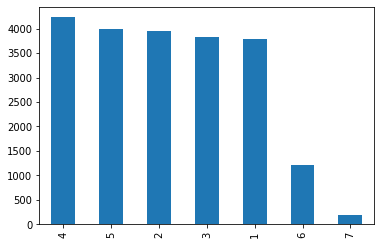

In [127]:
dataset_train['Arrival at Destination - Weekday (Mo = 1)'].value_counts().plot(kind='bar')

#### The graph shows that deliveries tend to reach the denstination during weekdays with Thursday being the most frequent day.  

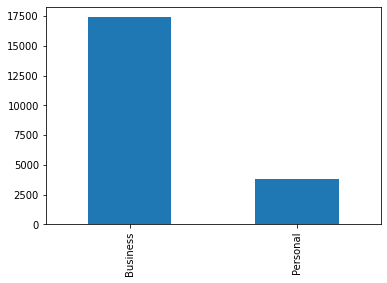

In [136]:
dataset_train['Personal or Business'].value_counts().plot(kind='bar')

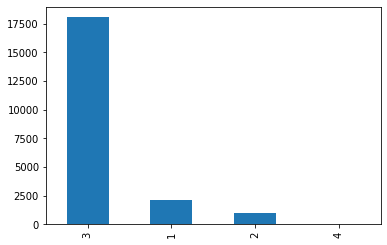

In [137]:
dataset_train['Platform Type'].value_counts().plot(kind='bar')

## Feature Scaling of the training and test data set

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [0]:
X_train

# **Training the Individual Models**

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

In [0]:
beta_0 = float(regressor.intercept_)

In [129]:
print(beta_0)

1556.9209471251343


In [0]:
#predicting y using the X_test
y_pred = regressor.predict(X_test)

In [131]:
#comparing the y_pred with the actual Y values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[14561.21   567.  ]
 [ -936.28  4903.  ]
 [ 2679.02  5649.  ]
 ...
 [  650.26      nan]
 [14831.47      nan]
 [17000.39      nan]]


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted = X2[['Order No','Time from Pickup to Arrival']]

In [133]:
predicted

,Order No,Time from Pickup to Arrival
0,Order_No_19248,14561.21
1,Order_No_12736,-936.28
2,Order_No_768,2679.02
3,Order_No_15332,-4371.79
4,Order_No_21373,6089.13
...,...,...
7063,Order_No_3612,3787.55
7064,Order_No_7657,14507.02
7065,Order_No_1969,650.26
7066,Order_No_10591,14831.47


In [0]:
#save the results as the .csv file
predicted.to_csv('predicted_time.csv',index=False)